In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
from sklearn import datasets

import yellowbrick
from yellowbrick.target import FeatureCorrelation

In [3]:
data = datasets.load_diabetes()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

In [4]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

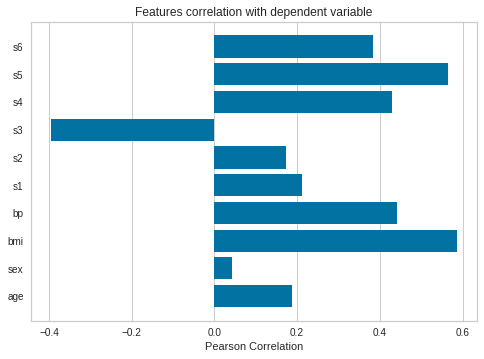

In [5]:
fea_corr = FeatureCorrelation(labels=feature_names)
fea_corr.fit(X, y)
fea_corr.poof()

In [6]:
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[1] = True

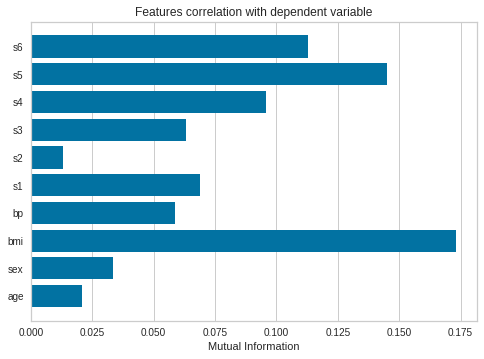

In [7]:
fea_corr = FeatureCorrelation(method='mutual_info-regression', labels=feature_names, random_state=0)
fea_corr.fit(X, y, discrete_features=discrete_features)
fea_corr.poof()

In [8]:
data = datasets.load_boston()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

In [9]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[3] = True

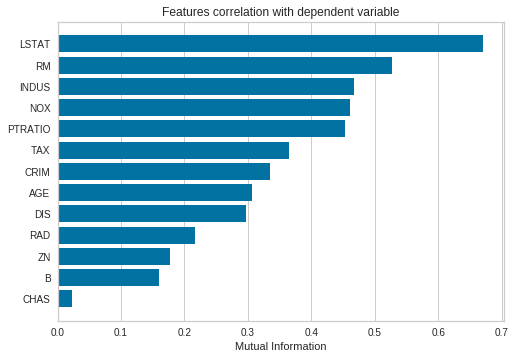

In [11]:
fea_corr = FeatureCorrelation(method='mutual_info-regression', 
                              labels=feature_names, random_state=0, 
                              sort=True)
fea_corr.fit(X, y, discrete_features=discrete_features)
fea_corr.poof()

In [12]:
data = datasets.load_wine()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])
X_pd = pd.DataFrame(X, columns=feature_names)

In [13]:
print(data['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

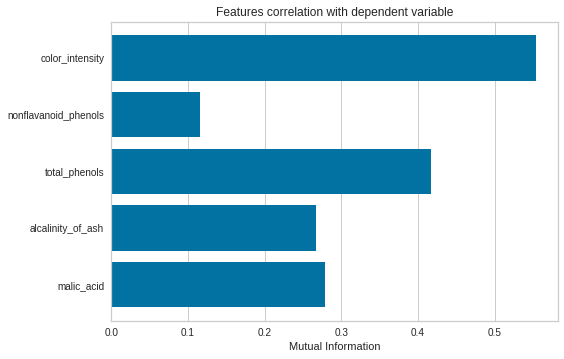

In [14]:
fea_corr = FeatureCorrelation(method='mutual_info-classification', 
                              random_state=0, feature_index=[1, 3, 5, 7, 9])
fea_corr.fit(X_pd, y)
fea_corr.poof()

In [15]:
feature_to_plot = ['alcohol', 'ash', 'hue', 'proline', 'total_phenols']

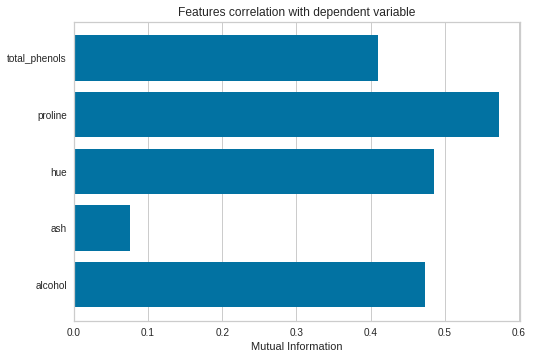

In [16]:
fea_corr = FeatureCorrelation(method='mutual_info-classification', 
                              random_state=0,
                              feature_names=feature_to_plot)
fea_corr.fit(X_pd, y)
fea_corr.poof()